# Исследования рынка общепита в Москве для принятия решения об открытии нового заведения

**Задача проекта** 

Исследование рынка общественного питания на основе открытых данных, подготовка презентации для инвесторов.

**Ход исследования**
- Обзор и предобработка данных;
- Исследовательский анализ данных по рынку заведений общественного питания;
- Подготовка рекомендаций о виде заведения, количестве посадочных мест, районе расположения и возможностях развития сети,
- Подготовка презентации исследования для инвесторов.


## Материалы:

* [Презентация](https://drive.google.com/file/d/1yqYgvyRfhC8kt0btKaTty4PUYpLtAJlH/view?usp=sharing)

## Обзор данных

Импортируем библиотеки

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.float_format', '{:,.2f}'.format)

Загрузим файл с данными, проверим на наличие дубликатов, пропусков, проверим типы данных.

In [ ]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_data.csv')

In [ ]:
def info (df):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.float_format', '{:,.2f}'.format)
    display(df.head(5))
    print(f'В таблице строк: {df.shape[0]}, столбцов: {df.shape[1]} ')
    print('Количество дубликатов:', df.duplicated().sum())
    print('Процент дубликатов: ', "{:.2%}".format((df.duplicated().sum()/df.shape[0])))
    tbl = pd.concat([df.dtypes, df.isna().sum(), round((df.isna().mean()*100),2), ], axis=1, 
                   keys=["Тип данных", "Кол-во пропусков", "% пропусков", ])
    display(tbl)

info(df)


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


В таблице строк: 15366, столбцов: 6 
Количество дубликатов: 0
Процент дубликатов:  0.00%


,Тип данных,Кол-во пропусков,% пропусков
id,int64,0,0.00
object_name,object,0,0.00
chain,object,0,0.00
object_type,object,0,0.00
address,object,0,0.00
number,int64,0,0.00


**Описание данных**
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.


Явных дубликатов не обнаружено. Приведем названия сетей к нижнему регистру и проверим дубликаты без учета колонки `id`

In [ ]:
df['object_name'] = df['object_name'].str.lower()
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [ ]:
df.duplicated(subset=['object_name', 'chain',  'object_type', 'address', 'number']).sum()


85

Обнаружено 85 дубликатов. Удалим их.

In [ ]:
df.drop_duplicates(subset=['object_name', 'chain',  'object_type', 'address', 'number'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15281 non-null  int64 
 1   object_name  15281 non-null  object
 2   chain        15281 non-null  object
 3   object_type  15281 non-null  object
 4   address      15281 non-null  object
 5   number       15281 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 835.7+ KB


**Вывод**

В таблице содержатся данные об объектах общественного питания. Пропусков не обнаружено. Типы данных в колонках соответствуют содержимому. Названия сетей привели к нижнему регистру и удалили обнаруженные дубликаты. После предобработки осталась 15281 строка. Количество данных достаточное для анализа. Можно перейти к следующему этапу.

## Анализ данных

### Исследуем соотношение видов объектов общественного питания по количеству

Посмотрим сколько объектов каждого типа содержится в базе. Построим столбчатую диаграмму.

In [ ]:
df['object_type'].value_counts()

кафе                                 6071
столовая                             2584
ресторан                             2282
предприятие быстрого обслуживания    1897
бар                                   855
буфет                                 576
кафетерий                             395
закусочная                            348
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

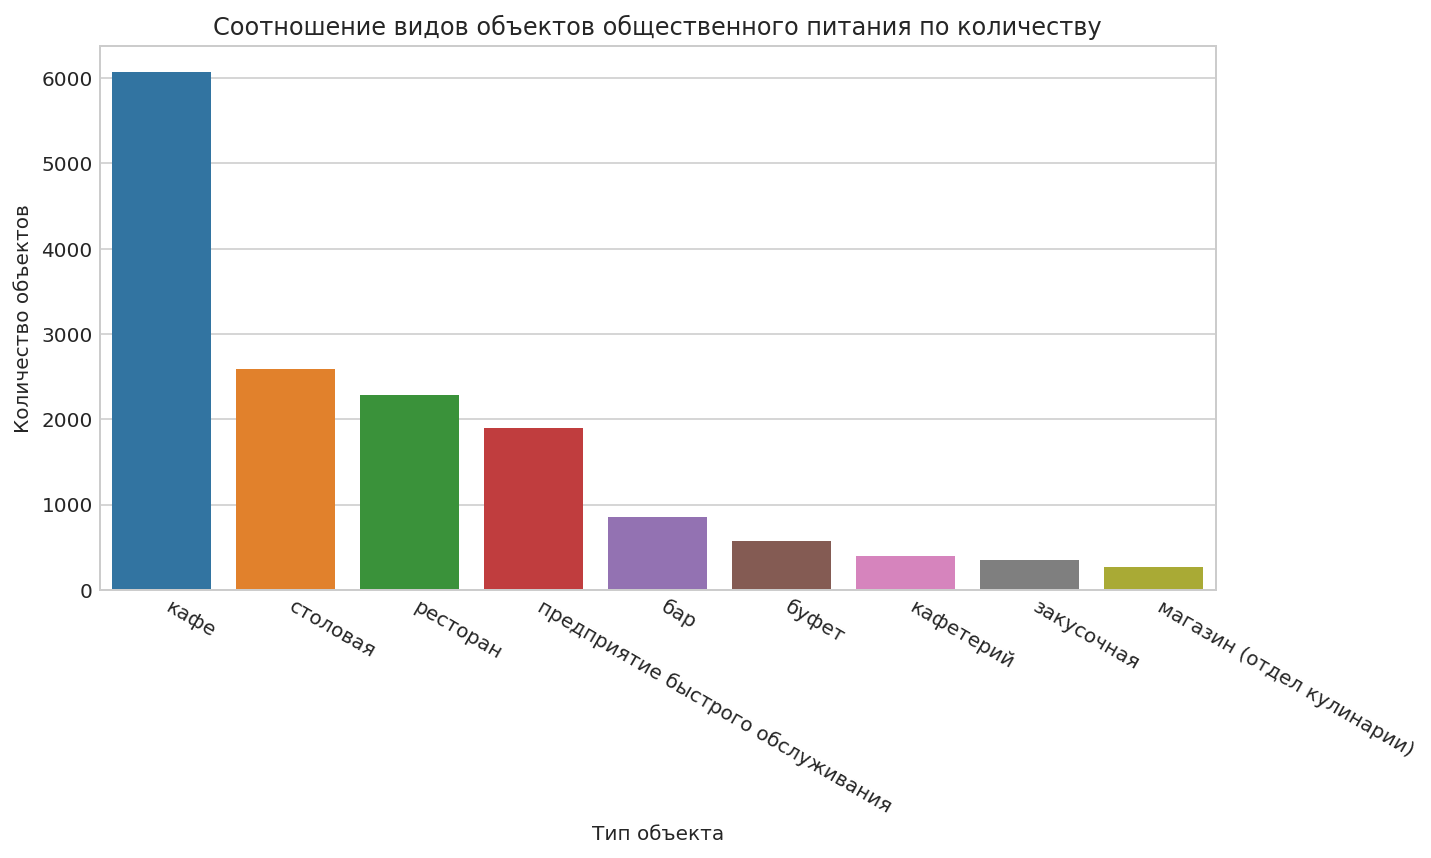

In [ ]:
fig = df['object_type'].value_counts().reset_index()
plt.figure(figsize = (10,5))
with plt.style.context('seaborn-whitegrid'): 
    sns.barplot(x='index', y='object_type', data=fig, )
    plt.xticks(rotation=-30, ha='left')
    plt.title('Cоотношение видов объектов общественного питания по количеству')
    plt.xlabel('Тип объекта')
    plt.ylabel('Количество объектов');

Большинство объектов - кафе, их более 6 тыс. Меньше всего в базе кафетериев, закусочных и отделов кулинарии. 

### Исследуем соотношение сетевых и несетевых заведений по количеству

Посчитаем количество сетевых и несетевых заведений.

In [ ]:
df['chain'].map({'нет':'несетевые','да':'сетевые'}).value_counts()

несетевые    12317
сетевые       2964
Name: chain, dtype: int64

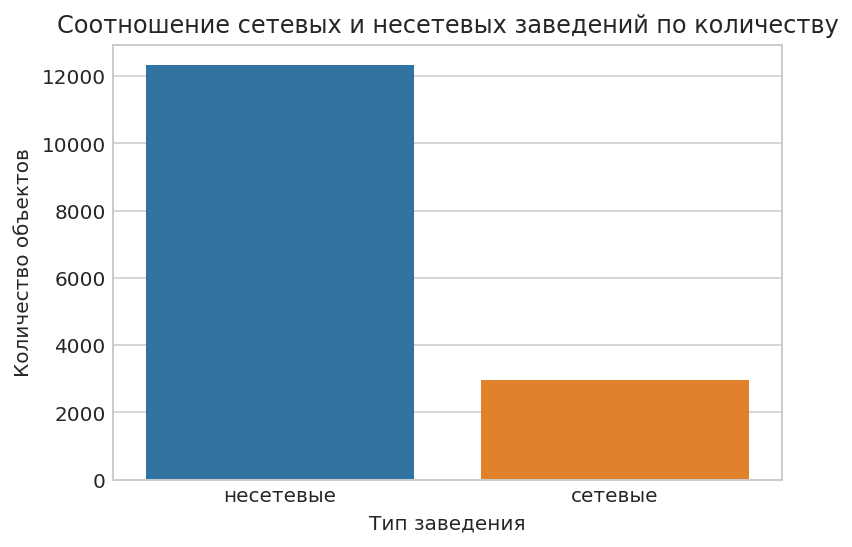

In [ ]:
fig2 = df['chain'].map({'нет':'несетевые','да':'сетевые'}).value_counts().reset_index()

with plt.style.context('seaborn-whitegrid'): 
    sns.barplot(x='index', y='chain', data=fig2,)
    plt.title('Cоотношение сетевых и несетевых заведений по количеству')
    plt.xlabel('Тип заведения')
    plt.ylabel('Количество объектов');

Итого 2964 сетевых заведения, что составляет всего около 19% от общего количества. 

### Определим для какого вида объекта общественного питания характерно сетевое распространение

Отберем только сетевые объекты и построим столбчатую диаграмму с соотношением видов объектов общественного питания.

In [ ]:
df[df['chain'] == 'да']['object_type'].value_counts()

кафе                                 1396
предприятие быстрого обслуживания     788
ресторан                              543
магазин (отдел кулинарии)              78
закусочная                             56
кафетерий                              52
бар                                    37
буфет                                  11
столовая                                3
Name: object_type, dtype: int64

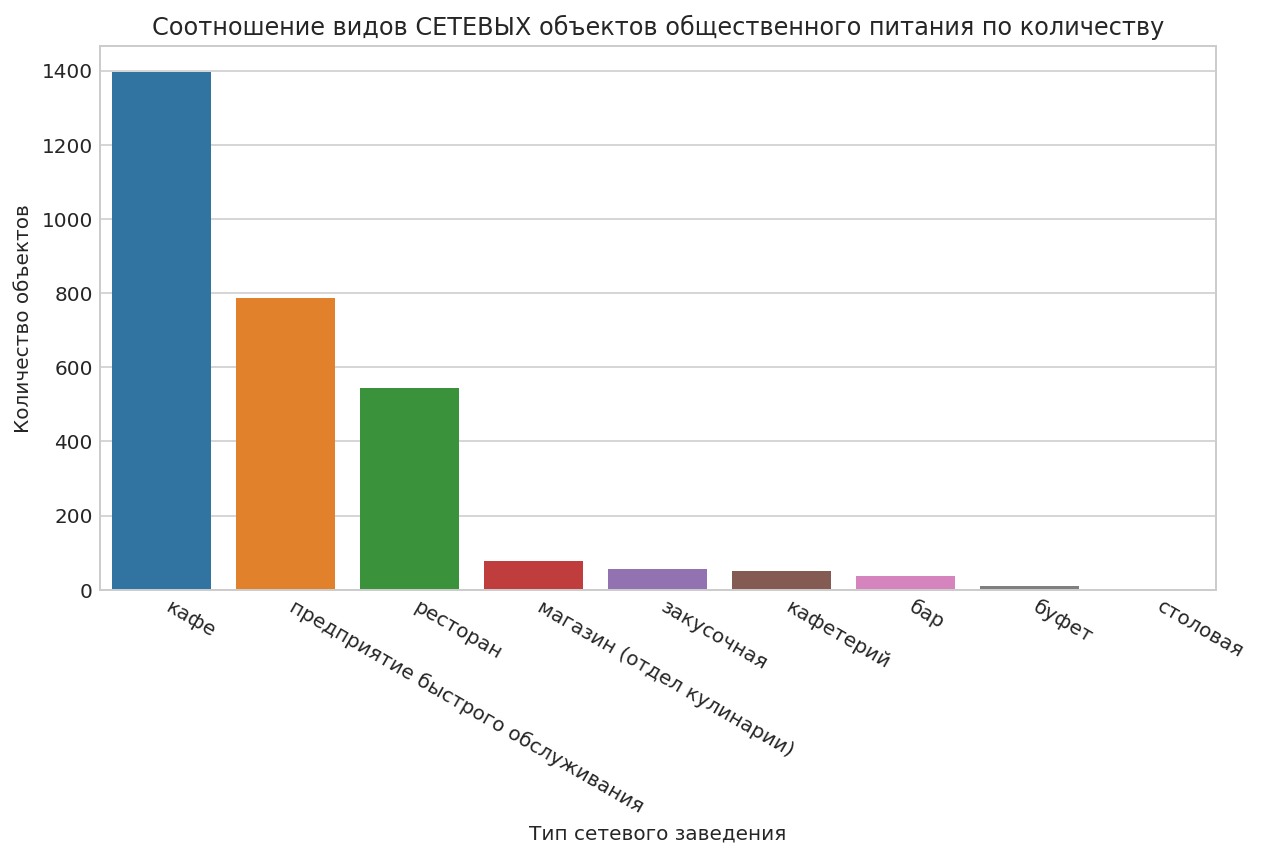

In [ ]:
chain_type = df[df['chain'] == 'да']['object_type'].value_counts().reset_index()

plt.figure(figsize = (10,5))
with plt.style.context('seaborn-whitegrid'): 
    sns.barplot(x='index', y='object_type', data=chain_type, )
    plt.title('Cоотношение видов СЕТЕВЫХ объектов общественного питания по количеству')
    plt.xlabel('Тип сетевого заведения')
    plt.ylabel('Количество объектов')
    plt.xticks(rotation=-30, ha='left');

Заметно лидируют три типа объектов. Чаще всего встречаются сетевые кафе (1396 объектов), на втором месте предприятия быстрого обслуживания (788 объект), на третьем - рестораны (543 объекта). Среди остальных объектов сетевых довольно мало.

### Определим что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Преобразуем столбец с названиями сетей для того, чтобы найти больше совпадений для группировки.

In [ ]:
dict = ['«', '»', '"', 'ресторан быстрого питания', 'японский', 'кафе', 'закусочная', 'кальян-бар', 'бар', 'ресторан', 'быстрого питания', 'предприятие быстрого обслуживания','(', ')', '- ']

for i in dict:
    df['object_name'] = df['object_name'].str.replace(i, '')


In [ ]:
chains = df[df['chain'] == 'да'].groupby('object_name').agg({'object_name':'count', 'number':'mean'})
chains.columns = ['objects', 'mean_number_of_seats']
chains.head(10)

,objects,mean_number_of_seats
object_name,,
ваби-саби,1,155.00
му-му,1,225.00
costa coffee,2,20.50
florentini,1,95.00
kfc,21,53.62
moskalyan,1,60.00
prime прайм стар,4,19.25
prime прайм стар прайм-,1,12.00
starbucks,2,29.50


In [ ]:
chains.describe()

,objects,mean_number_of_seats
count,521.00,521.00
mean,5.69,59.59
std,16.35,53.99
min,1.00,0.00
25%,1.00,20.00
50%,1.00,45.00
75%,3.00,83.50
max,157.00,306.00


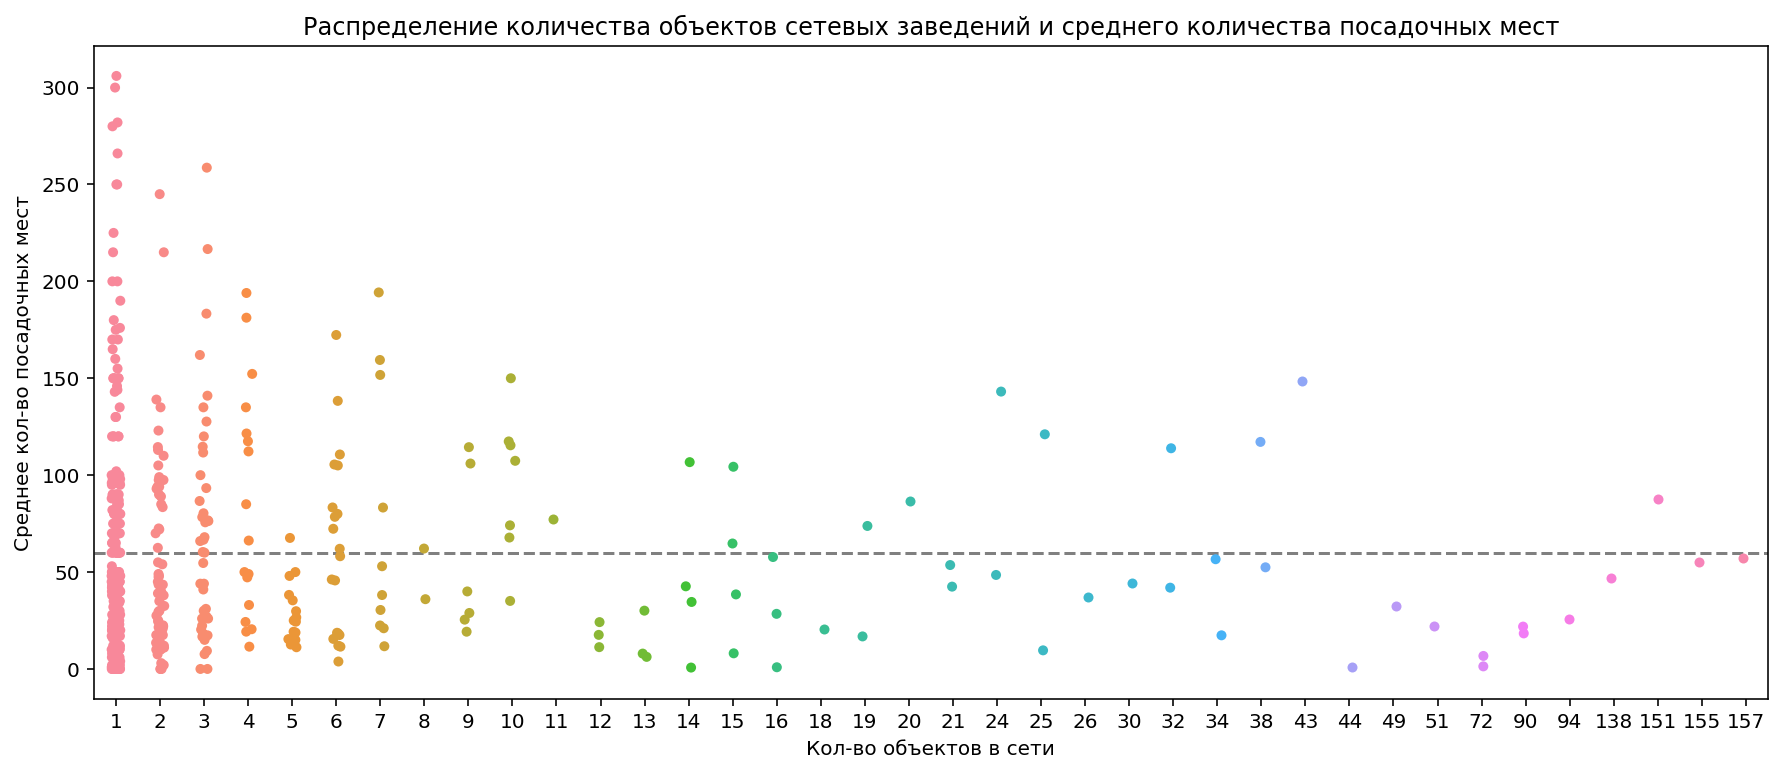

In [ ]:
plt.figure(figsize=(15,6))
sns.stripplot(data=chains, x='objects', y='mean_number_of_seats')
plt.title('Распределение количества объектов сетевых заведений и среднего количества посадочных мест', )
plt.xlabel('Кол-во объектов в сети')
plt.ylabel('Среднее кол-во посадочных мест')
plt.axhline(chains['mean_number_of_seats'].mean(), linestyle='--', color='grey');


Можно сказать, что для сетевых объектов характерно небольшое количество посадочных мест, вплоть до полного отсутствия, и небольшое количество заведений. При увеличении количества заведений нет явной тенденции к увеличению количества мест. 

Среднее количество посадочных мест - 60. Большинство сетей с большим количеством заведений находятся в пределах этого среднего. 

В тоже время среди сетей с 1-10 заведениями заметна тенденция к увеличению количества посадочных мест.  

Наши данные могут быть не совсем точными, т.к. в базе нет единообразия в написании названий сетей, таким образом доля сетей с малым кол-вом заведений может сократиться при других вводных.

### Для каждого вида объекта общественного питания найдем среднее количество посадочных мест. 


Сгруппируем объекты по типу заведения и найдем какой тип предоставляет в среднем самое большое количество посадочных мест.

In [ ]:
df.groupby('object_type')['number'].mean().sort_values(ascending=False)

object_type
столовая                            130.34
ресторан                             96.88
буфет                                51.43
бар                                  43.53
кафе                                 39.79
предприятие быстрого обслуживания    20.81
кафетерий                             9.18
закусочная                            7.85
магазин (отдел кулинарии)             5.59
Name: number, dtype: float64

Построим столбчатый график.

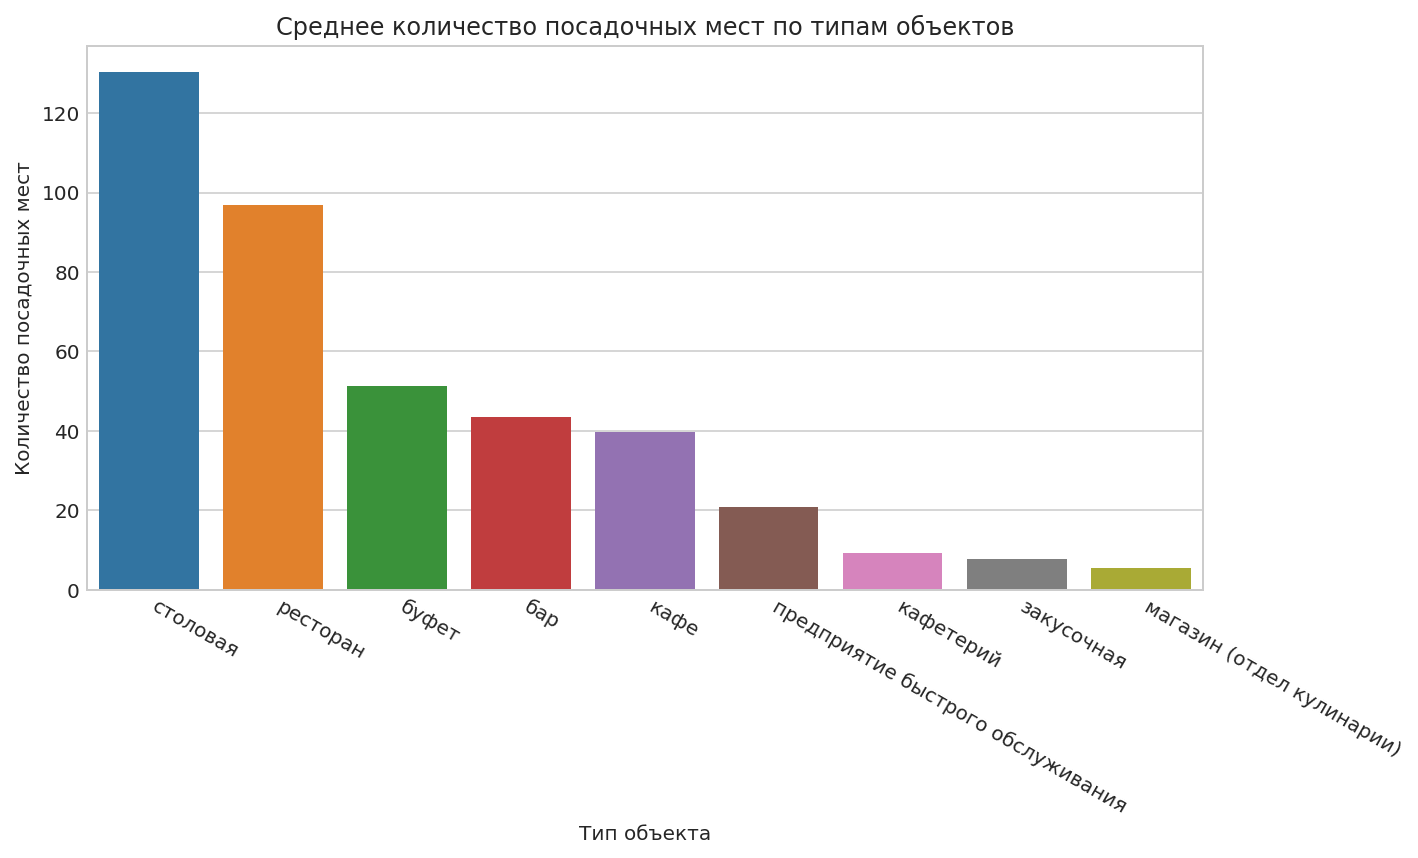

In [ ]:
number_of_seats = df.groupby('object_type')['number'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize = (10,5))
with plt.style.context('seaborn-whitegrid'): 
    sns.barplot(x='object_type', y='number', data=number_of_seats, )
    plt.title('Среднее количество посадочных мест по типам объектов')
    plt.xlabel('Тип объекта')
    plt.ylabel('Количество посадочных мест')
    plt.xticks(rotation=-30, ha='left');

В среднем самое большое количество мест у столовых (130), далее идут рестораны (97) и буфеты (51). Меньше всего мест в отделах кулинарии и закусочных.  

### Выделим в отдельный столбец информацию об улице из столбца address .



In [ ]:
df['street'] = df['address'].apply(lambda x: x.split(', ')[1])
df.head(5)

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


Исключим адреса, которые не являются улицами.

In [ ]:
df_part = df.drop(df[df['street'].str.contains('город|Зеленоград|поселение|дом')].index)

### Построим график топ-10 улиц по количеству объектов общественного питания

In [ ]:
top10 = df_part.groupby('street')['object_name'].count().sort_values(ascending=False).head(10).reset_index()
top10.columns = ['street', 'number_of_objects']
top10

,street,number_of_objects
0,проспект Мира,203
1,Профсоюзная улица,181
2,Ленинградский проспект,170
3,Пресненская набережная,167
4,Варшавское шоссе,161
5,Ленинский проспект,147
6,проспект Вернадского,128
7,Кутузовский проспект,114
8,Каширское шоссе,111
9,Кировоградская улица,108


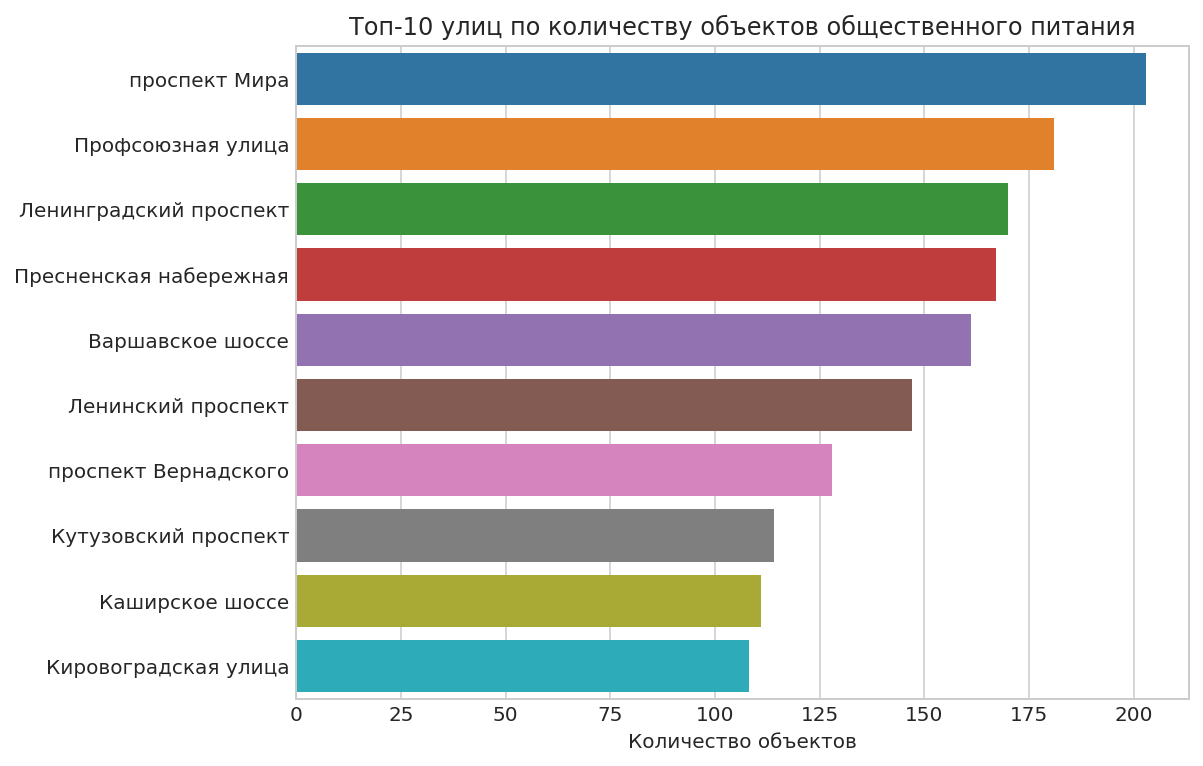

In [ ]:
plt.figure(figsize = (8,6))
with plt.style.context('seaborn-whitegrid'): 
    fig = sns.barplot(x='number_of_objects', y='street', data=top10, )
    plt.title('Топ-10 улиц по количеству объектов общественного питания')
    plt.ylabel(None)
    plt.xlabel('Количество объектов');


Воспользуемся внешней информацией и определим в каких районах Москвы находятся эти улицы.

In [ ]:
# загрузим внешний файл с названиями улиц и соответствующими округами и районами
from io import BytesIO
import requests
spreadsheet_id = '11Bc6ntVLs3T7xzhfEYz_B0LmbWeTp2qJ'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data = pd.read_csv(BytesIO(r.content))
data.columns = ['street', 'okrug', 'area']
data.head()

,street,okrug,area
0,Выставочный переулок,ЦАО,Пресненский
1,улица Гашека,ЦАО,Пресненский
2,Большая Никитская улица,ЦАО,Пресненский
3,Глубокий переулок,ЦАО,Пресненский
4,Большой Гнездниковский переулок,ЦАО,Пресненский


In [ ]:
top10 = top10.merge(data, on='street', how='left')
top10.head(10)

,street,number_of_objects,okrug,area
0,проспект Мира,203,СВАО,Алексеевский
1,проспект Мира,203,СВАО,Ярославский Район
2,проспект Мира,203,СВАО,Марьина роща
3,проспект Мира,203,СВАО,Останкинский
4,проспект Мира,203,СВАО,Ростокино
5,проспект Мира,203,СВАО,Свиблово
6,проспект Мира,203,ЦАО,Мещанский
7,Профсоюзная улица,181,ЮЗАО,Академический
8,Профсоюзная улица,181,ЮЗАО,Черемушки
9,Профсоюзная улица,181,ЮЗАО,Ясенево


In [ ]:
top10['okrug'].value_counts()

ЮЗАО    14
ЮАО     14
ЗАО      7
СВАО     6
САО      4
ЦАО      3
Name: okrug, dtype: int64

Преобразуем таблицу, объединим районы и округа в одной строке.

In [ ]:
top10 = (top10.groupby(['street'])
         .agg({'number_of_objects':['first'], 'okrug':['unique'], 'area':['unique']})
        )
top10.columns = ['objects', 'okrug', 'area']
top10 = top10.sort_values(by='objects', ascending=False).reset_index()
top10

,street,objects,okrug,area
0,проспект Мира,203,"[СВАО, ЦАО]","[Алексеевский, Ярославский Район, Марьина роща, Останкинский, Ростокино, Свиблово, Мещанский]"
1,Профсоюзная улица,181,[ЮЗАО],"[Академический, Черемушки, Ясенево, Коньково, Обручевский, Теплый Стан]"
2,Ленинградский проспект,170,[САО],"[Аэропорт, Беговой, Хорошевский, Сокол]"
3,Пресненская набережная,167,[ЦАО],[Пресненский]
4,Варшавское шоссе,161,"[ЮАО, ЮЗАО]","[Чертаново Центральное, Чертаново Северное, Чертаново Южное, Донской, Нагатино-Садовники, Нагорный, Северное Бутово, Южное Бутово]"
5,Ленинский проспект,147,"[ЗАО, ЮАО, ЮЗАО, ЦАО]","[Проспект Вернадского, Тропарево-Никулино, Донской, Гагаринский, Ломоносовский, Обручевский, Теплый Стан, Якиманка]"
6,проспект Вернадского,128,"[ЗАО, ЮЗАО]","[Проспект Вернадского, Раменки, Тропарево-Никулино, Гагаринский, Ломоносовский]"
7,Кутузовский проспект,114,[ЗАО],"[Дорогомилово, Фили-Давыдково]"
8,Каширское шоссе,111,[ЮАО],"[Москворечье-Сабурово, Нагатино-Садовники, Орехово-Борисово Южное, Орехово-Борисово Северное]"
9,Кировоградская улица,108,[ЮАО],"[Чертаново Центральное, Чертаново Северное, Чертаново Южное]"


**Карта административных округов г. Москвы**
![jupyter](https://snipp.ru/uploads/view/701cfbfd4f204ae7e7f14153c1c4dff0.png)

Все улицы из топ-10, кроме Пресненской набережной, располагаются сразу в нескольких районах Москвы. Ленинский проспект, проспект Вернадского, Варшавское шоссе и проспект Мира располагаются даже в разных округах. Чтобы точнее определить количество объектов в конкретных районах, необходимо сверяться с информацией о номерах домов для каждого объекта.

### Найдем число улиц с одним объектом общественного питания

In [ ]:
one_object = df_part.groupby('street')['object_name'].count().sort_values(ascending = False).reset_index()
one_object = one_object.query('object_name == 1')
display(one_object.head())
len(one_object)

,street,object_name
1279,Линейный проезд,1
1280,2-я Квесисская улица,1
1281,31-й километр Московской Кольцевой Автодороги,1
1282,Оренбургская улица,1
1283,2-я Напрудная улица,1


547

Воспользуемся внешней информацией и определим в каких районах Москвы находятся эти улицы.

In [ ]:
one_object = one_object.merge(data, on='street', how='left')[['street', 'okrug', 'area']]
one_object.head(10)

,street,okrug,area
0,Линейный проезд,САО,Тимирязевский Район
1,2-я Квесисская улица,САО,Савеловский
2,31-й километр Московской Кольцевой Автодороги,NaN,NaN
3,Оренбургская улица,ВАО,Косино-Ухтомский
4,2-я Напрудная улица,СВАО,Лосиноостровский
5,30-й километр Московской Кольцевой Автодороги,NaN,NaN
6,Олонецкий проезд,СВАО,Бабушкинский
7,2-я Прядильная улица,ВАО,Измайлово
8,3-я Черепковская улица,ЗАО,Кунцево
9,Платовская улица,ЗАО,Дорогомилово


In [ ]:
one_object['area'].nunique()

99

In [ ]:
one_object['area'].value_counts().head(5)

Таганский      27
Хамовники      26
Басманный      25
Тверской       20
Пресненский    19
Name: area, dtype: int64

In [ ]:
one_object['okrug'].value_counts()

ЦАО           185
ВАО            70
СВАО           67
САО            55
ЮВАО           55
ЗАО            41
ЮАО            30
СЗАО           27
ЮЗАО           27
Зеленоград      1
Name: okrug, dtype: int64

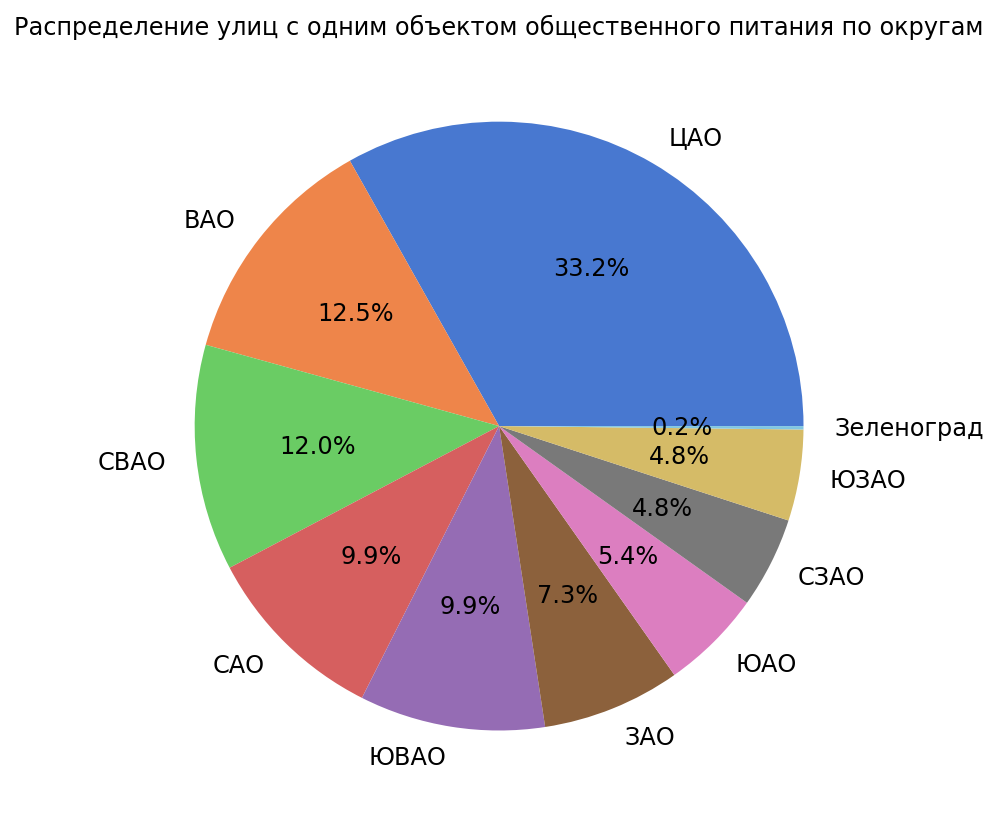

In [ ]:
colors = sns.color_palette('muted')
temp = one_object['okrug'].value_counts().plot.pie(figsize=(7,7), autopct='%1.1f%%', fontsize=12, colors=colors, )
plt.title('Распределение улиц с одним объектом общественного питания по округам')
plt.ylabel(None);


Мы получили таблицу с улицами и соответствующими им районами. Итого у нас есть 547 улиц, где расположен только один объект общественного питания и эти улицы расположены в 99 районах Москвы. 

Больше всего одиночных объектов в районах: Таганский, Хамовники, Бассманный. Среди округов лидирует ЦАО, вероятно потому, что там больше улиц малой протяженности.

### Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. 


In [ ]:
street_data = df.query('street in @top10.street')
street_data.head()

,id,object_name,chain,object_type,address,number,street
151,155973,андерсон,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,23618,subway,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,155852,ламаджо,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
154,152556,шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,120658,выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе


In [ ]:
street_data['number'].describe()

count   1,490.00
mean       58.27
std        90.26
min         0.00
25%        12.00
50%        40.00
75%        75.00
max     1,700.00
Name: number, dtype: float64

In [ ]:
np.percentile(street_data['number'], 90)

138.20000000000027

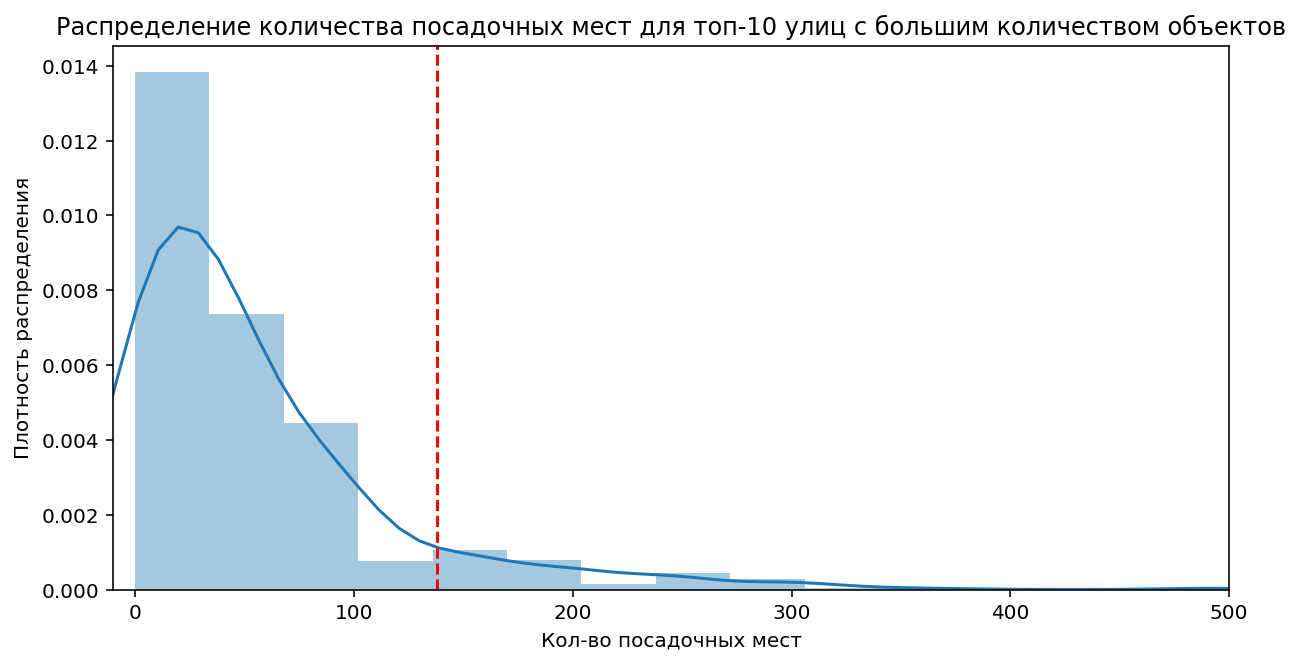

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(street_data['number'])
plt.xlim(-10, 500)
plt.title('Распределение количества посадочных мест для топ-10 улиц с большим количеством объектов')
plt.xlabel('Кол-во посадочных мест')
plt.ylabel('Плотность распределения')
plt.axvline(x=np.percentile(street_data['number'], 90), linestyle='--', color='red');

В 90% зведений не более 138 посадочных мест.

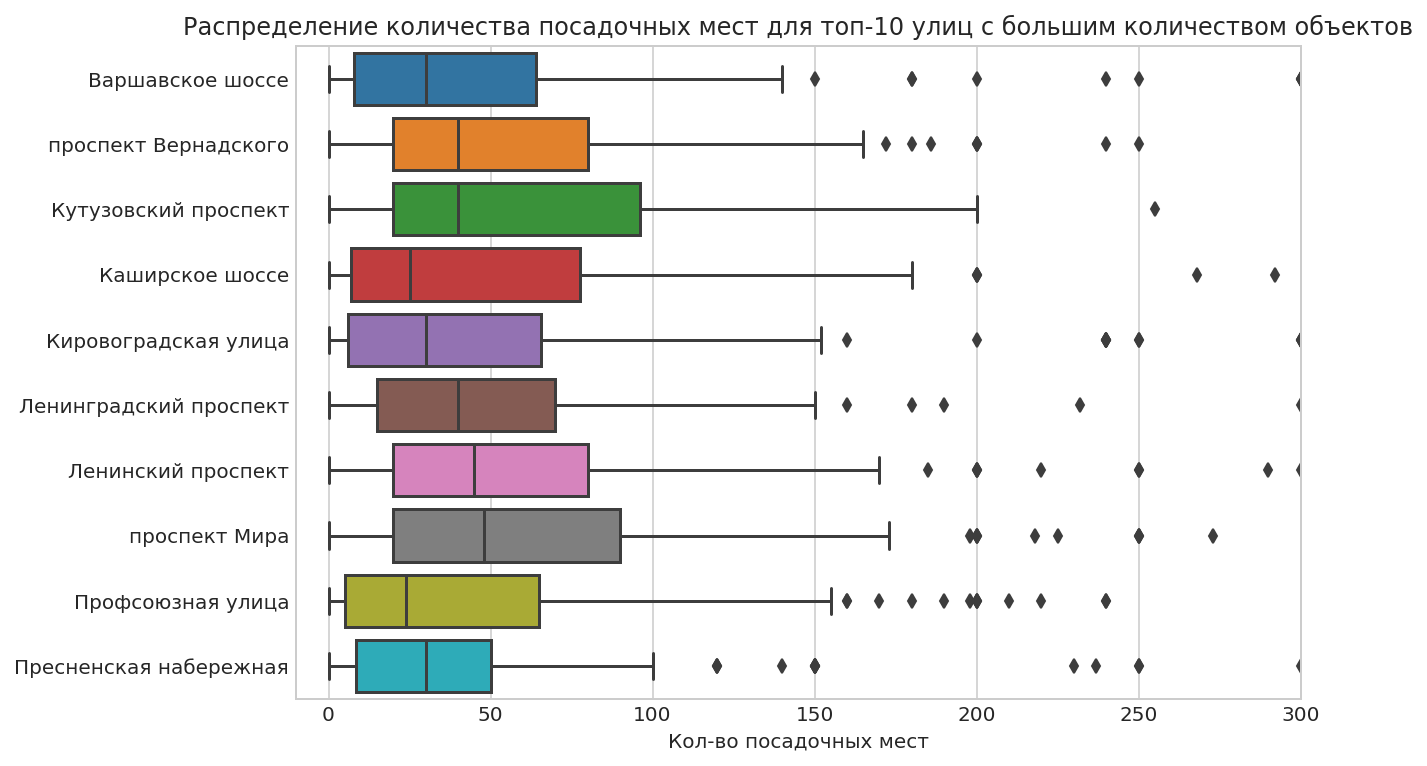

In [ ]:
plt.figure(figsize=(9,6))
with plt.style.context('seaborn-whitegrid'):
    plt.xlim(-10, 300)
    sns.boxplot(x='number', y='street', data=street_data, )
    plt.title('Распределение количества посадочных мест для топ-10 улиц с большим количеством объектов')
    plt.xlabel('Кол-во посадочных мест')
    plt.ylabel(None);

По нашим данным можно сказать, что в большинстве заведений на популярных улицах небольшое количество посадочных мест. Среднее количество мест - 58, и только в 10% заведений больше 138 мест. Можно предположить, что в на этих популярных улицах сложнее и дороже арендовать большие площади. 

## Общий вывод

Обобщим имеющиеся данные:

- Самый распространенный тип объекта общественного питания это кафе, их более 6 тыс., что составляет около 40% от общего количества. Далее идут столовые, рестораны и предприятие быстрого обслуживания (фаст-фуды), 2500 - 1900 объектов каждого типа.
- Преобладают несетевые объекты, их около 80%.
- Основные типы сетевых объектов: кафе (1396 объектов), фаст-фуды (788 объектов) и рестораны (543 объекта)
- Для сетевых объектов характерно небольшое количество посадочных мест, вплоть до 0, и небольшое количество заведений (1-3). 
- В среднем самое большое количество мест у столовых (130), далее идут рестораны (97) и буфеты (51). Меньше всего мест в отделах кулинарии и закусочных.
- Больше всего объектов находится на протяженных и нагруженных улицах с большой проходимостью: проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная. 
- Популярные улицы находятся в основном в Южном, Юго-Западном и Западном округах.
- Больше всего улиц с одним объектом общественного питания расположено в ЦАО, можно объяснить это небольшой протяженностью улиц.
- В большинстве заведений на популярных улицах небольшое количество посадочных мест.

**Рекомендации**

Поскольку нам важно сохранить популярность заведения на долгое время, рекомендуется рассмотреть улицы с большой проходимостью, но не самым большим количеством других заведений. Важно учесть близость к метро, объектам инфраструктуры, бизнес-центрам. Инновационное кафе может заинтересовать туристов, обеспечив постоянный поток новых посетителей. Таким образом можно рассмотреть размещение в ЦАО, и в районах с достопримечательностями Москвы, либо вблизи вокзалов. 

Если рассматривать тип заведения "кафе", как наиболее распространенное и знакомое, то оптимальное количество мест рекомендуется не более 60. Если нам важно разместить наибольшее количество гостей, следует выбрать тип "столовая". 
